# Data Processing with Pandas
- __Series__
- __DataFrame__
- __Time Series__
- __Intro to Seaborn__

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
#pd.set_option('display.mpl_style', 'default')
plt.style.use('default')

## Series object

* Feature: ability to index data with labels instead of integers.

In [6]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [7]:
type(s)

pandas.core.series.Series

In [8]:
s.dtype, s.index, s.values

(dtype('int64'),
 RangeIndex(start=0, stop=4, step=1),
 array([ 909976, 8615246, 2872086, 2273305]))

In [9]:
s.index = ["Stockholm", "London", "Rome", "Paris"]
s.name = "Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [10]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")

In [11]:
# can access by index (label), or directly via attribute with same name
s["London"], s.Stockholm

(8615246, 909976)

In [12]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [13]:
# descriptive stats
s.median(), s.mean(), s.std(), s.min(), s.max()

(2572695.5, 3667653.25, 3399048.5005155364, 909976, 8615246)

In [14]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [15]:
# attributes summary
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

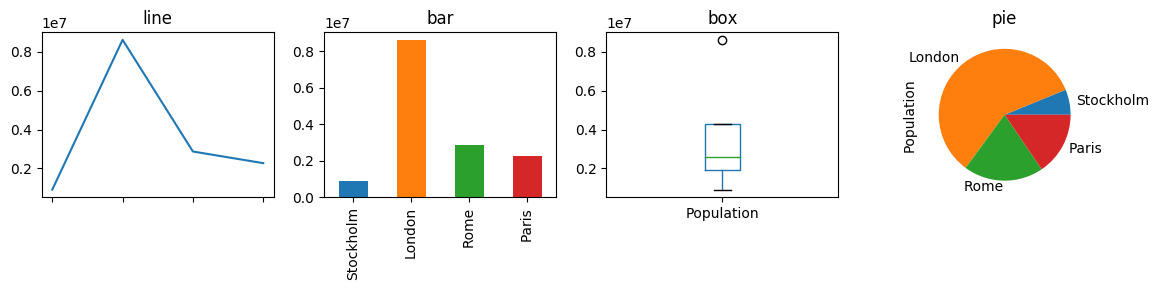

In [16]:
# visualization - line plot, bar plot, box plot, pic chart

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
fig.savefig("ch12-series-plot.pdf")
fig.savefig("ch12-series-plot.png")

### DataFrame object
* Can be viewed as collection of Series objects with common index

In [17]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]])
df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [18]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]])
df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [19]:
# setup for labeled indexing, either columns or rows
df.index = ["Stockholm", "London", "Rome", "Paris"]
df.columns = ["Population", "State"]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [20]:
# setup during initial creation
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [32]:
# alternative: use dict objects to create a dataframe

df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [33]:
df.index

Index(['Stockholm', 'London', 'Rome', 'Paris'], dtype='object')

In [34]:
df.columns

Index(['Population', 'State'], dtype='object')

In [35]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United kingdom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

In [36]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [37]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [38]:
# extracting a column from a dataframe returns a series object
type(df.Population)

pandas.core.series.Series

In [39]:
df.Population.Stockholm

909976

In [40]:
# access dataframe rows with the loc attribute.
type(df.loc)

pandas.core.indexing._LocIndexer

In [41]:
# extracting column from df == new Series object
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [42]:
# passing list of row labels == new DataFrame
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [43]:
# selecting rows & cols simultaneously == new DataFrame, Series, or element value
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [44]:
# descriptive statistics - mean, std, median, min, max, ...
df.mean()

Population    3667653.25
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
Population    4 non-null int64
State         4 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [46]:
# datatypes for each column
df.dtypes

Population     int64
State         object
dtype: object

### Larger datasets
* example creates a dataframe from a CSV file.
* head(), tail() = handy methods to show truncated dataset.

In [48]:
# use head() to review first few records.
df_pop = pd.read_csv("european_cities.csv")
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [49]:
# additional args for read_csv()
df_pop = pd.read_csv("european_cities.csv", delimiter=",", encoding="utf-8", header=0)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
Rank                       105 non-null int64
City                       105 non-null object
State                      105 non-null object
Population                 105 non-null object
Date of census/estimate    105 non-null object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [50]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [51]:
# apply(): tool for transforming content in a column. returns new Series object.
# remove commas from population fields & recast as integers

df_pop["NumericPopulation"] = df_pop.Population.apply(
    lambda x: int(x.replace(",", "")))

df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [52]:
# remove whitespace from state field

df_pop["State"] = df_pop["State"].apply(
    lambda x: x.strip())

df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [53]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [54]:
# use city field as index, and sort
df_pop2 = df_pop.set_index("City")
df_pop2 = df_pop2.sort_index()

In [55]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [57]:
# create hierarchical index via list of column names
# sortlevel(0) = sort by state

# sortlevel deprecated
#df_pop3 = df_pop.set_index(["State", "City"]).sortlevel(0)

df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [61]:
# partial indexing
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [62]:
# complete indexing with tuple of all hierarchical indices
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [63]:
# sort by column other than index
df_pop.set_index("City").sort_values(by=["State", "NumericPopulation"], 
                              ascending=[False, True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [64]:
# summarizing categorical data
city_counts = df_pop.State.value_counts()
city_counts.name = "# cities in top 105"
city_counts

Germany                     19
United Kingdom              16
Spain                       13
Poland                      10
Italy                       10
France                       5
Netherlands                  4
Romania                      3
Bulgaria                     3
Sweden                       3
Lithuania                    2
Denmark                      2
Greece                       2
Czech Republic               2
Belgium                      2
Portugal                     1
Slovakia Slovak Republic     1
Austria                      1
Finland                      1
Hungary                      1
Estonia                      1
Latvia                       1
Croatia                      1
Ireland                      1
Name: # cities in top 105, dtype: int64

In [65]:
# how much population of all cities within a state?
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])

In [66]:
df_pop4 = df_pop3.sum(level="State").sort_values(by="NumericPopulation", ascending=False)

In [67]:
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [68]:
# alternative using groupby

df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values(by="NumericPopulation", ascending=False))
df_pop5.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


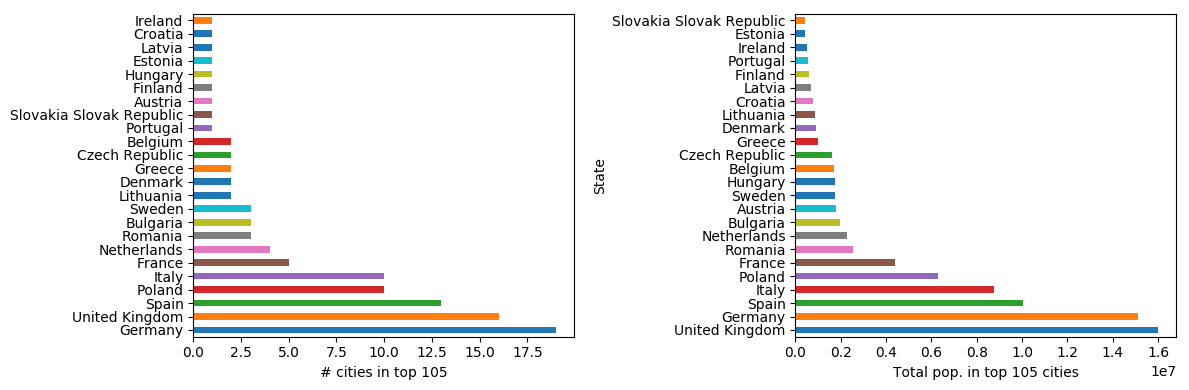

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

fig.tight_layout()
fig.savefig("ch12-state-city-counts-sum.pdf")

### Time series
* **Series** & **DataFrame** can support time series structures. Pandas has **DatetimeIndex** & **PeriodIndex** indexers to help.

In [70]:
import datetime

In [71]:
# generate date range. default frequency = daily.
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [72]:
# generate datetime range (starting, ending, hourly)
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [73]:
# return instance of DatetimeIndex
ts1 = pd.Series(
    np.arange(31), 
    index=pd.date_range("2015-1-1", periods=31))

ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [74]:
ts1["2015-1-3"]

2

In [75]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [76]:
# time series elements
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [77]:
# Timestamps = nanosecond resolution
# datetimes  = microsecond resolution
ts1.index[2].nanosecond

0

In [78]:
# conversion to datetime
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [79]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), 
                       datetime.datetime(2015, 2, 1)])
ts2

2015-01-01    0.522910
2015-02-01    0.502548
dtype: float64

In [80]:
# PeriodIndex - use to define sequences of time spans
periods = pd.PeriodIndex(
    [pd.Period('2015-01'), 
     pd.Period('2015-02'), 
     pd.Period('2015-03')])

In [81]:
ts3 = pd.Series(np.random.rand(3), periods)
ts3

2015-01    0.028349
2015-02    0.781381
2015-03    0.173739
Freq: M, dtype: float64

In [82]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]', freq='M')

In [83]:
ts2.to_period('M')

2015-01    0.522910
2015-02    0.502548
Freq: M, dtype: float64

In [84]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

PeriodIndex(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
             '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
            dtype='period[M]', freq='M')

### Temperature time series example
* indoor & outdoor datasets in TSV (tab-separated value) format
* each with 2 columns: UNIX timestamp, temperature (celsius)

In [86]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [87]:
df1 = pd.read_csv(
    'temperature_outdoor_2014.tsv', 
    delimiter="\t", 
    names=["time", "outdoor"])

In [88]:
df2 = pd.read_csv(
    'temperature_indoor_2014.tsv', 
    delimiter="\t", 
    names=["time", "indoor"])

In [89]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [90]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


* Convert UNIX timestampes to date & time objects
* Also localize timestamps to a given timezone.

In [91]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [92]:
df1 = df1.set_index("time")

In [93]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Europe/Stockholm'))

In [94]:
df2 = df2.set_index("time")

In [95]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


In [96]:
df1.index[0]

Timestamp('2014-01-01 00:03:06+0100', tz='Europe/Stockholm')

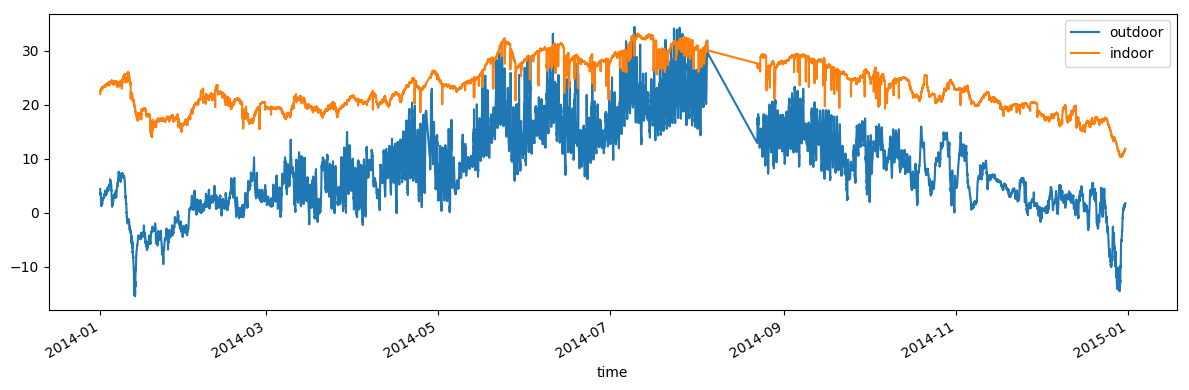

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-temperature-2014.pdf")

In [98]:
# almost 50K datapoints across 2014
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


* Common use case: selecting/extracting portions of a dataset
* In this case, January data

In [99]:
df1_jan = df1[
    (df1.index > "2014-1-1") & 
    (df1.index < "2014-2-1")]

In [100]:
df1.index < "2014-2-1"

array([ True,  True,  True, ..., False, False, False])

In [101]:
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
outdoor    4452 non-null float64
dtypes: float64(1)
memory usage: 69.6 KB


In [102]:
df2_jan = df2["2014-1-1":"2014-1-31"]

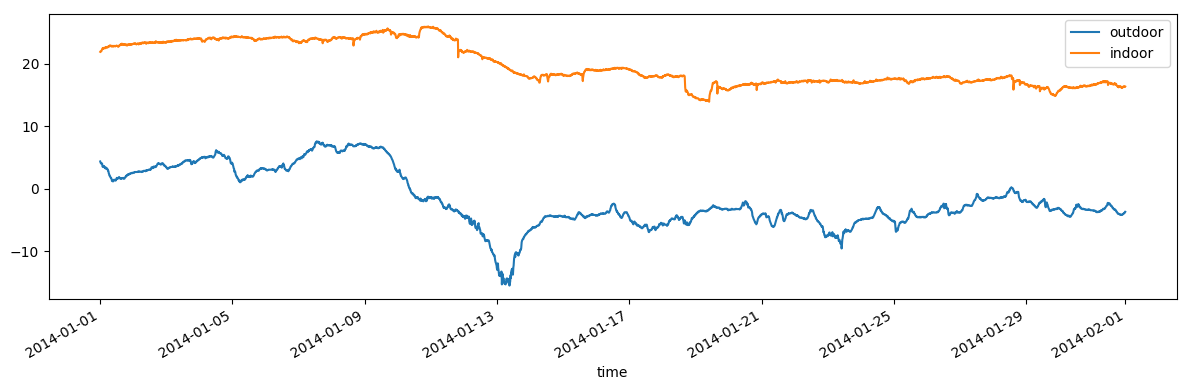

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
fig.savefig("ch12-timeseries-selected-month.pdf")

* Grouping data (in this case, by month)

In [104]:
df1_month = df1.reset_index()

In [105]:
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [106]:
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


* Now group DataFrame by new month field & aggregate grouped values with mean()

In [107]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [108]:
df2_month = df2.reset_index()

In [109]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [110]:
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [111]:
df_month = df1_month.join(df2_month)

In [112]:
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [113]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

In [114]:
df_month.head(3)

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


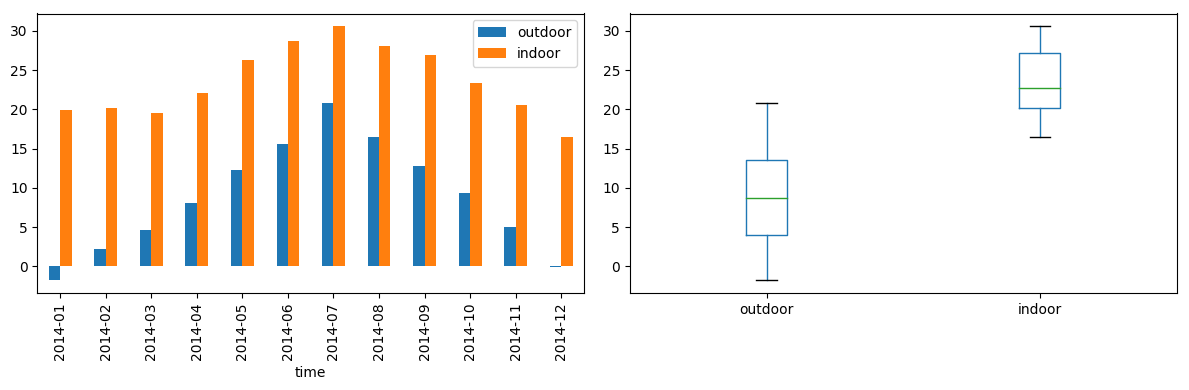

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
fig.savefig("ch12-grouped-by-month.pdf")

### Resampling

In [116]:
df_month

,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748
2014-04,8.105193,22.149754
2014-05,12.261396,26.332160
2014-06,15.586955,28.687491
2014-07,20.780314,30.605333
2014-08,16.494823,28.099068
2014-09,12.823905,26.950366


In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
outdoor    49548 non-null float64
dtypes: float64(1)
memory usage: 774.2 KB


In [122]:
# resample(): 1st argument = string that represents a new data period.
# ex: "H" = hourly

df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]

df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]

df1_week = df1.resample("W").mean()
df1_week.columns = ["outdoor (weekly avg.)"]

df1_month = df1.resample("M").mean()
df1_month.columns = ["outdoor (monthly avg.)"]

df_diff = (df1.resample("D").mean().outdoor - df2.resample("D").mean().indoor)

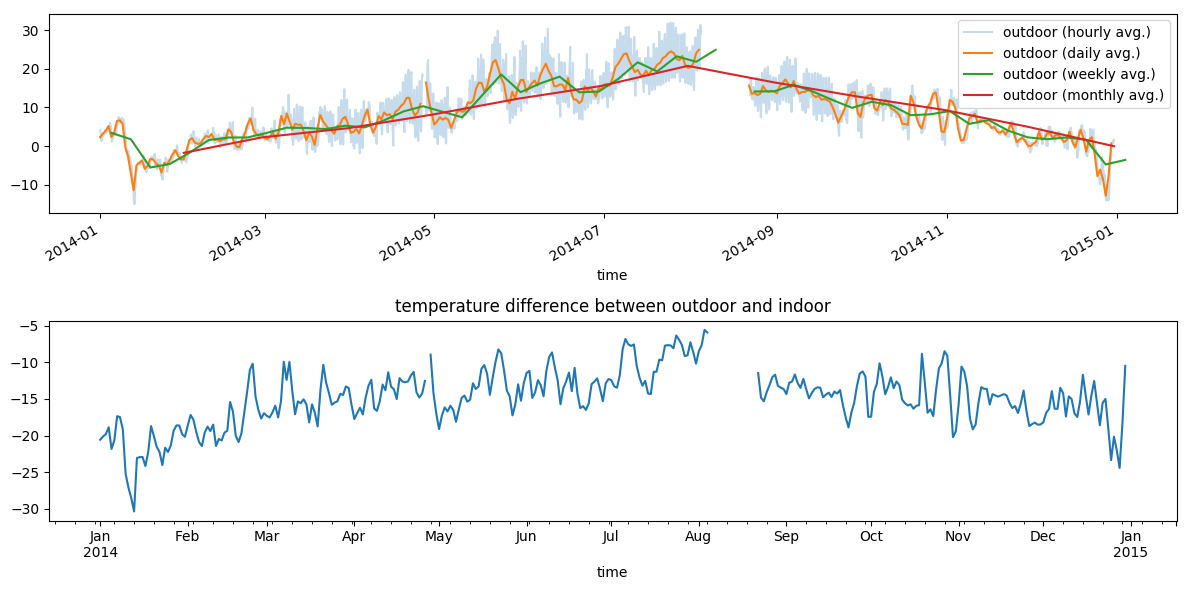

In [123]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
fig.savefig("ch12-timeseries-resampled.pdf")

* Resampling to 5-minute frequency with three aggregation methods
* mean, ffill (forward fill), bfill (backward fill)
* Some values are not filled (NaN) based on aggregation method.

In [127]:
pd.concat(
    [df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
     df1.resample("5min").ffill().rename(columns={"outdoor": 'ffill'}),
     df1.resample("5min").bfill().rename(columns={"outdoor": 'bfill'})],
    axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


# Seaborn statistical visualization library
- Built on top of Matplotlib
- Distribution plots, kernel density plots, joint distributions, factor plots, heatmaps, facet plots, many more.
- Much better color usage (aesthetics)

In [128]:
import seaborn as sns

In [129]:
sns.set(style="darkgrid")

In [130]:
#sns.set(style="whitegrid")

In [134]:
df1 = pd.read_csv(
    'temperature_outdoor_2014.tsv', 
    delimiter="\t", 
    names=["time", "outdoor"])

df1.time = pd.to_datetime(
    df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df1 = df1.set_index("time").resample("10min").mean()

df2 = pd.read_csv(
    'temperature_indoor_2014.tsv', 
    delimiter="\t", 
    names=["time", "indoor"])

df2.time = pd.to_datetime(
    df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')

df2 = df2.set_index("time").resample("10min").mean()

df_temp = pd.concat([df1, df2], axis=1)

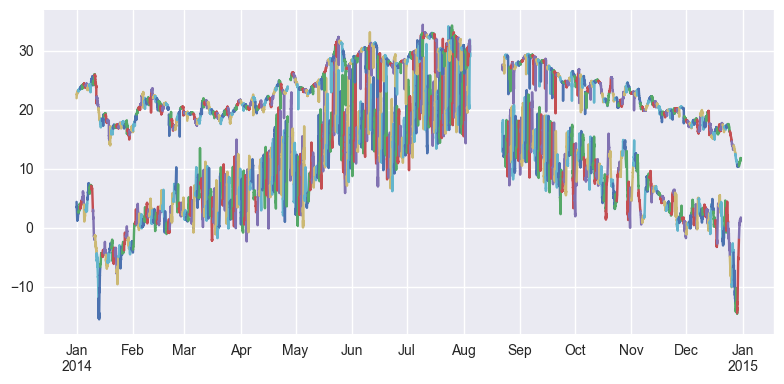

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
df_temp.resample("D").plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
fig.savefig("ch12-seaborn-plot.pdf")

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


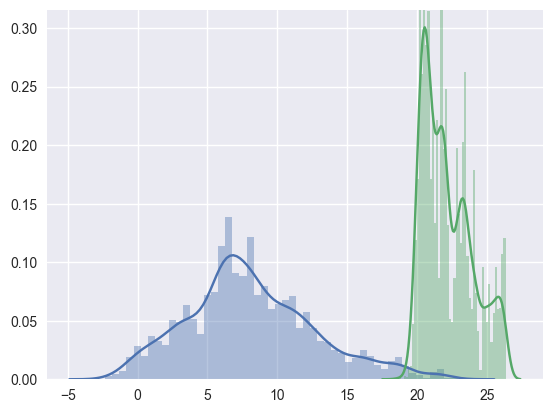

In [139]:
# distribuion (histogram) plots, outdoor & indoor temp data
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

plt.savefig("ch12-seaborn-distplot.pdf")

In [143]:
df_temp.resample("H")["outdoor"].describe

<bound method SeriesGroupBy.describe of <pandas.core.groupby.groupby.SeriesGroupBy object at 0x7f354ee2eac8>>

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/bjpcjp/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


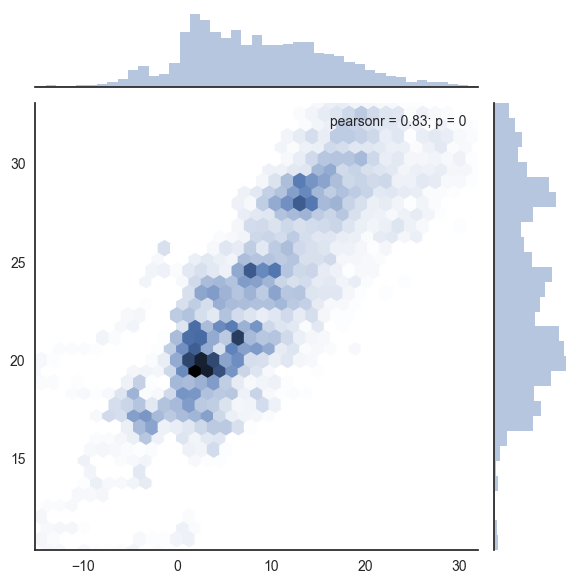

In [144]:
# joint distribution plot - indoor/outdoor temp correlation, resampled to hourly averages
# TODO: resolve "non-tuple sequence for multi-d indexing is deprecated" warning

with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()["outdoor"].values,
                  df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
plt.savefig("ch12-seaborn-jointplot.pdf")

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


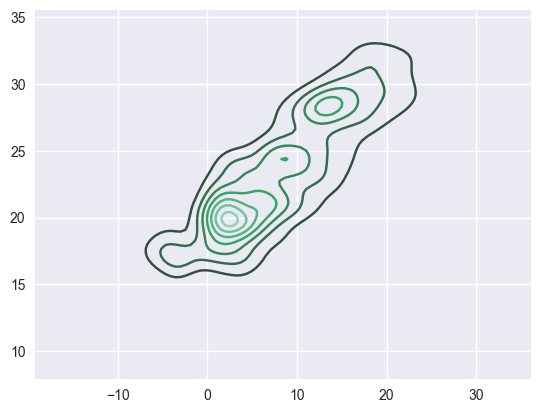

In [145]:
# Kernel Density Estimation (KDE) plot
# TODO: resolve "non-tuple sequence for multi-d indexing is deprecated" warning

sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values,
            df_temp.resample("H").mean()["indoor"].dropna().values, shade=False);

plt.savefig("ch12-seaborn-kdeplot.pdf")

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


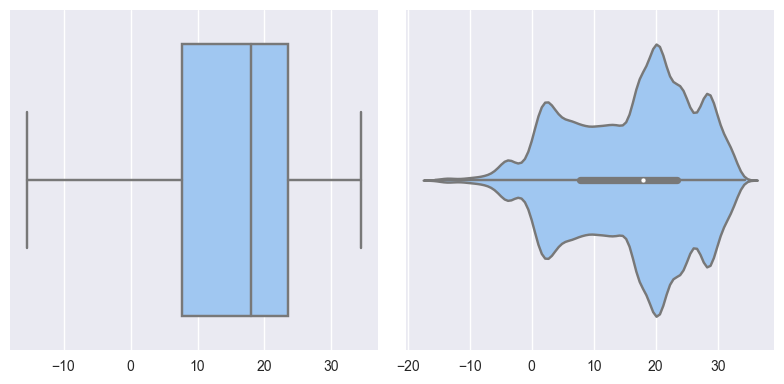

In [147]:
# category data helpers:
# box plot (viz for descriptive stats: min, max, median, quartiles)
# violin plot (box plot with KDE data shown by box plot width)
# TODO: resolve "non-tuple sequence for multi-d indexing is deprecated" warning

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(df_temp.dropna(), ax=ax2, palette="pastel")

fig.tight_layout()
fig.savefig("ch12-seaborn-boxplot-violinplot.pdf")

/home/bjpcjp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


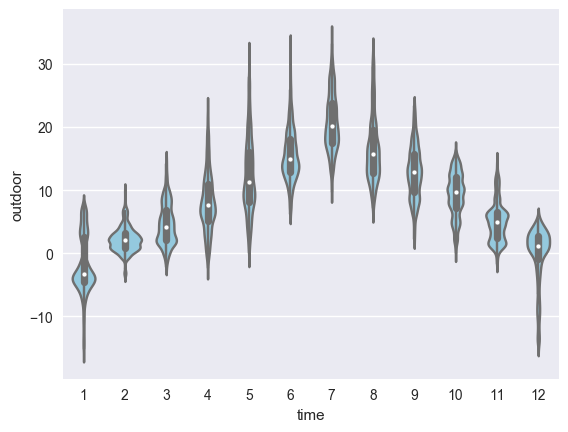

In [148]:
#violin plot: outdoor temp data partitioned by month
# shows distribution of temp for each month

sns.violinplot(
    x=df_temp.dropna().index.month, 
    y=df_temp.dropna().outdoor, 
    color="skyblue");

plt.savefig("ch12-seaborn-violinplot.pdf")

In [149]:
# heatmaps: useful for categorical data with large # of categories.

df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [150]:
df_temp.head()

,outdoor,indoor,month,hour
time,,,,
2014-01-01 00:00:00+01:00,4.38,21.94,1,0
2014-01-01 00:10:00+01:00,4.25,22.00,1,0
2014-01-01 00:20:00+01:00,4.19,22.00,1,0
2014-01-01 00:30:00+01:00,4.06,22.00,1,0
2014-01-01 00:40:00+01:00,4.06,22.00,1,0


In [152]:
table = pd.pivot_table(
    df_temp, 
    values='outdoor', 
    index=['month'], 
    columns=['hour'], 
    aggfunc=np.mean); table

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,-1.692312,-1.750162,-1.826649,-1.879086,-1.922527,-1.968065,-2.020914,-2.035806,-2.101774,-2.001022,...,-1.457849,-1.696935,-1.814194,-1.812258,-1.853297,-1.898432,-1.839730,-1.806486,-1.854462,-1.890811
2,1.613690,1.521190,1.479405,1.464371,1.506407,1.485595,1.499167,1.516946,1.669226,2.067725,...,3.573593,3.360741,2.939390,2.501607,2.357425,2.236190,2.204458,2.137619,2.024671,1.896190
3,3.192366,2.866774,2.628000,2.524140,2.384140,2.235538,2.243387,2.622258,3.419301,4.466290,...,7.790323,7.930914,7.595892,6.770914,5.731508,4.983784,4.437419,4.022312,3.657903,3.407258
4,5.832738,5.336012,4.926667,4.597059,4.380000,4.109769,4.123699,4.741437,5.878035,7.272299,...,12.175556,12.500059,12.494483,12.361156,11.989240,10.454881,8.857619,7.712619,6.974762,6.293512
5,9.792204,9.369351,9.009839,8.670914,8.463387,8.446919,8.772324,9.562742,10.723622,12.047717,...,15.542581,15.744624,15.784839,15.799570,17.009892,15.685161,13.632796,12.216290,11.291237,10.622849
6,13.209556,12.792889,12.382889,11.967889,11.735778,11.886667,12.503778,13.338167,14.343444,15.665475,...,18.630556,18.866292,18.680611,18.529832,20.057877,18.853389,16.969777,15.675111,14.658778,13.898167
7,17.956344,17.348641,16.793152,16.309892,16.001559,15.986774,16.506613,17.478226,18.850054,20.533763,...,24.598441,25.030000,24.869194,24.764409,26.155161,24.896505,22.550269,20.882649,19.699022,18.822634
8,14.498205,13.960128,13.555128,12.995641,12.651410,12.485974,12.680130,13.403506,14.578780,16.170833,...,20.473810,20.292381,20.328795,19.642436,19.373846,18.713462,17.034872,15.843590,15.146154,14.596667
9,11.133000,10.725667,10.362444,9.976833,9.729333,9.503944,9.357500,9.689778,10.600778,11.829106,...,16.336983,16.828268,17.031056,16.786983,15.853556,14.534637,13.350444,12.545278,11.954190,11.399056


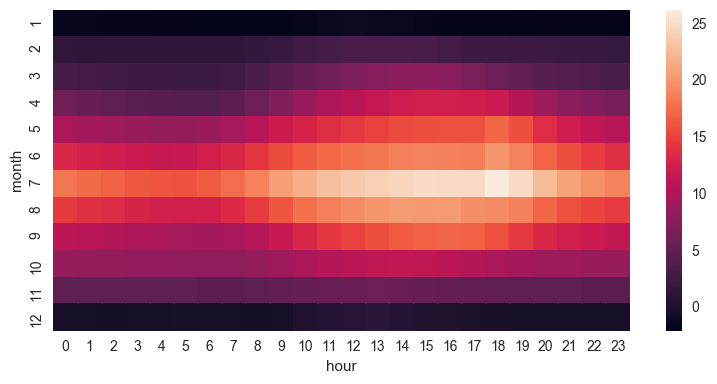

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
fig.savefig("ch12-seaborn-heatmap.pdf")